In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def model(y, t, params):

    # LHS
    E = y[0]
    S = y[1]
    ES = y[2]
    P = y[3]
    
    # params
    k1 = params[0]
    k2 = params[1]
    k3 = params[2]
    
    # rates
    v1 = k1*S*E
    v2 = k2*ES
    v3 = k3*ES

    # RHS (dydt)
    dydt = np.zeros(4)
    # first reaction
    dydt[0] = dydt[0] - v1
    dydt[1] = dydt[1] - v1
    dydt[2] = dydt[2] + v1
    #second reaction
    dydt[0] = dydt[0] + v2
    dydt[1] = dydt[1] + v2
    dydt[2] = dydt[2] - v2
    #third reaction
    dydt[0] = dydt[0] + v3
    dydt[2] = dydt[2] - v3
    dydt[3] = dydt[3] + v3
    
    return dydt

In [3]:
# initial conditions
E_0 = 10
S_0 = 10
ES_0 = 0
P_0 = 0
init = [E_0, S_0, ES_0, P_0]

In [4]:
# params
k1 = 10
k2 = 10
k3 = 0.5
params = [k1, k2, k3]

In [5]:
tspan = np.arange(0,21)

In [6]:
y = odeint(model, init, tspan, (params,))

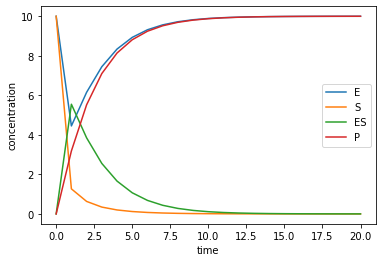

In [7]:
plt.plot(tspan,y[:,0], label='E')
plt.plot(tspan,y[:,1], label='S')
plt.plot(tspan,y[:,2], label='ES')
plt.plot(tspan,y[:,3], label='P')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend(loc='best')

In [8]:
def model1(y, t, params):

    # LHS
    S = y[0]
    P = y[1]
    # params
    k1 = params[0]
    k2 = params[1]
    k3 = params[2]
    etot = params[3]
    
    # rates

    v = (k3*etot*S)/(S+(k2+k3)/k1)
    
    # RHS (dydt)
    dydt = np.zeros(2)
    dydt[0] = -v
    dydt[1] = v
    
    return dydt

In [9]:
params1 = [k1, k2, k3, (E_0+ES_0)]

In [10]:
init1 = [S_0, P_0]

In [11]:
t1 = np.arange(0,21)

In [14]:
y1 = odeint(model1, init1, t1, (params1,))

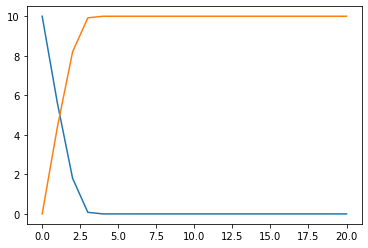

In [15]:
plt.plot(t1, y1)

Text(0.5, 1.0, 'quasi steady-state')

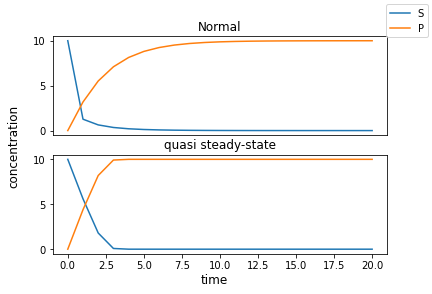

In [17]:
fig, ax = plt.subplots(2,1)
ax[0].plot(tspan,y[:,1], label='S')
ax[0].plot(t1,y[:,3], label='P')
ax[1].plot(t1,y1)
fig.legend()
fig.supxlabel('time')
fig.supylabel('concentration')
ax[0].set_xticks([])
ax[0].set_title('Normal')
ax[1].set_title('quasi steady-state')